# Introdução

Neste arquivo nos propomos a fazer uma análise dos dados a respeito de quantidade de unidades locais a partir de um arquivo contendo o nível da análise (grande região, unidade da federação ou município), o código referente ao nível (um número inteiro), qual é a região/federação/município, o ano referente aos dados, a classificação do CNAE (com código e nome da atividade), e a quantidade de unidades locais.

As seguintes análises foram feitas:
- Construção de tabelas com as 5 atividades com maiores quantidades de unidades locais, nos níveis de grande região, unidade da federação e municipal;
- Para cada tabela construímos uma tabela pivô, indexada pela atividade e com colunas representando cada região para facilitar as comparações;
- Finalmente, construímos uma análise gráfica das comparações obtidas.

Todas as análises foram inicialmente feitas com o ano de 2021. Na sequência comparou-se os valores com anos anteriores, verificando se houve continuidade dos anos anteriores ou se houve quebra no padrão.

O arquivo enviado não comporta todos os dados que possivelmente poderiam ser exportados, uma vez que o programa Excel possui um limite de 1.048.586 linhas por planilha. Acredita-se que os dados foram exportados do programa PowerBI, que possui um limite muito maior, o que limitou a análise.

# Tratamento dos dados

## Importação das bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print('Importação finalizada')

Importação finalizada


## Leitura dos dados

### Observações importantes sobre a leitura dos dados

Duas observações importantes no tratamento dos dados: primeiramente, foi necessário salvar a tabela original de Excel em outro arquivo, nomeado `dados_gks_2.xlsx`, para poder fazer sua leitura pelo pacote `pandas`. Segundo, acredito que os dados eram originalmente do PowerBI, que possui um limite maior de gerenciamento de dados. 

O Excel possui uma limitação de 1.048.576 linhas por planilha, que gerou erros na abertura do arquivo e ocasionou a necessidade de salvar em um arquivo diferente. É melhor exportar os dados em formato `.csv`, que é mais leve que o Excel e não possui tal limitação.

In [2]:
# Leitura do arquivo excel
df = pd.read_excel('dados_gks_2.xlsx', skiprows=2, sheet_name='Tabela')
df.head()

,Nível,Cód.,"Grande Região, Unidade da Federação e Município",Ano,Classificação Nacional de Atividades Econômicas (CNAE 2.0),Unnamed: 5
0,GR,1.0,Norte,2017.0,49 Transporte terrestre,5173
1,NaN,NaN,NaN,NaN,49.1 Transporte ferroviário e metroferroviário,7
2,NaN,NaN,NaN,NaN,49.11-6 Transporte ferroviário de carga,7
3,NaN,NaN,NaN,NaN,49.12-4 Transporte metroferroviário de passage...,-
4,NaN,NaN,NaN,NaN,49.21-3 Transporte rodoviário coletivo de pass...,395


Pela inicialização da tabela vemos alguns pontos que precisam ser tratados:
- Existem muitos dados faltantes (representados pela sigla `NaN`, que significa `Not a Number`) com diferentes naturezas: os dados faltantes de nível, código, região e ano referem-se a uma extensão do primeiro valor não-nulo. Por exemplo, nas cinco linhas mostradas basta repetir as informações da primeira (pois todas as linhas correspondem ao mesmo nível, código, região, e ano). Entretanto, os dados faltantes na última coluna referem-se às quantidades de unidades locais na determinada região, ou seja, a falta de dado será tratada como falta de pessoas naquela atividade. Portanto, esses dados faltantes serão substituídos por zero;
- A classificação do CNAE será mais legível se dividirmos em duas novas colunas: uma coluna para o código e uma coluna para a descrição da atividade;
- A última coluna precisa ser renomeada, pois a leitura automática da tabela não interpretou o nome ou o nome não foi fornecido nos dados.

In [3]:
# Renomeando a coluna
df.rename(columns={'Unnamed: 5' : 'Unidades locais'}, inplace=True)
df.head()

,Nível,Cód.,"Grande Região, Unidade da Federação e Município",Ano,Classificação Nacional de Atividades Econômicas (CNAE 2.0),Unidades locais
0,GR,1.0,Norte,2017.0,49 Transporte terrestre,5173
1,NaN,NaN,NaN,NaN,49.1 Transporte ferroviário e metroferroviário,7
2,NaN,NaN,NaN,NaN,49.11-6 Transporte ferroviário de carga,7
3,NaN,NaN,NaN,NaN,49.12-4 Transporte metroferroviário de passage...,-
4,NaN,NaN,NaN,NaN,49.21-3 Transporte rodoviário coletivo de pass...,395


Fazemos agora uma contagem de quantos valores não-nulos existem, assim como os formatos de dados que foram armazenados os dados da tabela.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048573 entries, 0 to 1048572
Data columns (total 6 columns):
 #   Column                                                      Non-Null Count    Dtype  
---  ------                                                      --------------    -----  
 0   Nível                                                       3813 non-null     object 
 1   Cód.                                                        3813 non-null     float64
 2   Grande Região, Unidade da Federação e Município             3813 non-null     object 
 3   Ano                                                         19065 non-null    float64
 4   Classificação Nacional de Atividades Econômicas (CNAE 2.0)  1048573 non-null  object 
 5   Unidades locais                                             1048573 non-null  object 
dtypes: float64(2), object(4)
memory usage: 48.0+ MB


Observamos que existem 3813 valores não-nulos para as colunas `Nível`, `Cód.` e `Grande Região, Unidade da Federação e Município`. Isso corrobora a ideia de que essas informações aparecem uma vez e repetem-se para as linhas abaixo, conforme mostrado na primeira linha da tabela.

O comando também mostrou que:
- As colunas `Nível`, `Grande Região, Unidade da Federação e Município`, `Classificação Nacional de Atividades Econômicas (CNAE 2.0)`e `Unidades locais` possuem formato de dado `object`, que é o formato adotado pelo pacote `pandas` quando não é capaz de inferir o tipo correto de dado; e
- As colunas `Cód.` e `Ano` estão com formato `float64`, para dados numéricos decimais.

Como próximo passo, mostramos quantos dados nulos aparecem na tabela.

In [5]:
df.isna().sum()

Nível                                                         1044760
Cód.                                                          1044760
Grande Região, Unidade da Federação e Município               1044760
Ano                                                           1029508
Classificação Nacional de Atividades Econômicas (CNAE 2.0)          0
Unidades locais                                                     0
dtype: int64

Antes de preencher os dados faltantes faremos uma alteração, transformando a coluna `Classificação Nacional de Atividades Econômicas (CNAE 2.0)` em duas colunas, uma coluna contendo o código CNAE e outra contendo o nome da atividade, em seguida deletando a coluna.

In [6]:
df[['Código CNAE', 'Atividade']] = df['Classificação Nacional de Atividades Econômicas (CNAE 2.0)'].str.extract(r'^([\d.-]+)\s(.*)$')
df = df.drop(columns=['Classificação Nacional de Atividades Econômicas (CNAE 2.0)'])
df.head()

,Nível,Cód.,"Grande Região, Unidade da Federação e Município",Ano,Unidades locais,Código CNAE,Atividade
0,GR,1.0,Norte,2017.0,5173,49,Transporte terrestre
1,NaN,NaN,NaN,NaN,7,49.1,Transporte ferroviário e metroferroviário
2,NaN,NaN,NaN,NaN,7,49.11-6,Transporte ferroviário de carga
3,NaN,NaN,NaN,NaN,-,49.12-4,Transporte metroferroviário de passageiros
4,NaN,NaN,NaN,NaN,395,49.21-3,"Transporte rodoviário coletivo de passageiros,..."


Reordenamos as colunas para voltar ao formato com o código e atividade antes da quantidade de unidades locais.

In [7]:
df = df.reindex(columns=['Nível', 'Cód.', 'Grande Região, Unidade da Federação e Município', 'Ano', 'Código CNAE', 'Atividade', 'Unidades locais'])
df.head()

,Nível,Cód.,"Grande Região, Unidade da Federação e Município",Ano,Código CNAE,Atividade,Unidades locais
0,GR,1.0,Norte,2017.0,49,Transporte terrestre,5173
1,NaN,NaN,NaN,NaN,49.1,Transporte ferroviário e metroferroviário,7
2,NaN,NaN,NaN,NaN,49.11-6,Transporte ferroviário de carga,7
3,NaN,NaN,NaN,NaN,49.12-4,Transporte metroferroviário de passageiros,-
4,NaN,NaN,NaN,NaN,49.21-3,"Transporte rodoviário coletivo de passageiros,...",395


Agora preenchemos os dados faltantes das colunas `Nível`, `Cód.`, `Grande Região, Unidade da Federação e Município`, e `Ano` com o método `forward-fill`, que copia a primeira célula não-vazia até encontrar outra célula não-vazia, repetindo o processo.

In [8]:
df[['Nível', 'Cód.', 'Grande Região, Unidade da Federação e Município', 'Ano']] = df[['Nível', 'Cód.', 'Grande Região, Unidade da Federação e Município', 'Ano']].fillna(method='ffill')
df.head()

,Nível,Cód.,"Grande Região, Unidade da Federação e Município",Ano,Código CNAE,Atividade,Unidades locais
0,GR,1.0,Norte,2017.0,49,Transporte terrestre,5173
1,GR,1.0,Norte,2017.0,49.1,Transporte ferroviário e metroferroviário,7
2,GR,1.0,Norte,2017.0,49.11-6,Transporte ferroviário de carga,7
3,GR,1.0,Norte,2017.0,49.12-4,Transporte metroferroviário de passageiros,-
4,GR,1.0,Norte,2017.0,49.21-3,"Transporte rodoviário coletivo de passageiros,...",395


Isto garante que, quando reorganizarmos a tabela em diferentes modos poderemos indexar por nível, código, região ou outra variável.

Agora substituímos os dados faltantes na coluna `Unidades locais`, colocando `0` no lugar de `-`.

In [9]:
df[['Unidades locais']] = df[['Unidades locais']].replace(to_replace='-', value='0')
df.head()

,Nível,Cód.,"Grande Região, Unidade da Federação e Município",Ano,Código CNAE,Atividade,Unidades locais
0,GR,1.0,Norte,2017.0,49,Transporte terrestre,5173
1,GR,1.0,Norte,2017.0,49.1,Transporte ferroviário e metroferroviário,7
2,GR,1.0,Norte,2017.0,49.11-6,Transporte ferroviário de carga,7
3,GR,1.0,Norte,2017.0,49.12-4,Transporte metroferroviário de passageiros,0
4,GR,1.0,Norte,2017.0,49.21-3,"Transporte rodoviário coletivo de passageiros,...",395


Verificando que todos os dados faltantes foram preenchidos:

In [10]:
df.isna().sum()

Nível                                              0
Cód.                                               0
Grande Região, Unidade da Federação e Município    0
Ano                                                0
Código CNAE                                        0
Atividade                                          0
Unidades locais                                    0
dtype: int64

Mudamos os tipos de dados das colunas para finalizar o tratamento de dados:

In [11]:
df = df.astype({'Nível' : "category", 'Cód.' : int, 'Grande Região, Unidade da Federação e Município' : "category", 'Ano' : int, 'Código CNAE' : "category", 'Atividade' : "category", 'Unidades locais' : int})
df.dtypes

Nível                                              category
Cód.                                                  int32
Grande Região, Unidade da Federação e Município    category
Ano                                                   int32
Código CNAE                                        category
Atividade                                          category
Unidades locais                                       int32
dtype: object

As colunas `Cód.`, `Ano` e `Unidades locais` foram alteradas para inteiro e as colunas `Nível`, `Grande Região, Unidade da Federação e Município`, `Código CNAE` e `Atividade` foram alteradas para `category`, que é um tipo especial de dado em pandas otimizado para categorias, ocupando menos memória e facilitando o uso.

Vamos criar também um dicionário fazendo uma correspondência entre as atividades e seus respectivos códigos CNAE, caso necessário.

In [12]:
# Selecionando os códigos distintos da CNAE
codigos_cnae = df['Código CNAE'].unique()

# Selecionando as atividades distintas da CNAE
atividades_cnae = df['Atividade'].unique()

# Criando o dicionário de correspondências
dicio_cnae = {atividade : codigo for codigo, atividade in zip(codigos_cnae, atividades_cnae)}

## Criação das tabelas regionais

Agora criaremos três tabelas separadamente:
- Uma tabela apenas para as grandes regiões, escolhendo regiões com códigos atendendo `Cód. > 0` e `Cód. < 10`, que correspondem apenas às macrorregiões (Centro-Oeste, Nordeste, Norte, Sudeste, Sul);
- Uma tabela apenas para as unidades da federação, escolhendo regiões com códigos `Cód. > 10` e `Cód. < 100`;
- Uma tabela apenas para os municípios, escolhendo regiões com códigos `Cód. > 100`.

In [13]:
# Construindo a tabela das grandes regiões
grand_reg = df[(df['Cód.'] > 0) & (df['Cód.'] < 10)]

# Renomeando as colunas
grand_reg = grand_reg.rename(columns={'Grande Região, Unidade da Federação e Município' : 'Grande Região'})

# Retirando colunas desnecessárias
grand_reg = grand_reg.drop(columns=['Nível', 'Cód.', 'Código CNAE'])

grand_reg.head()

,Grande Região,Ano,Atividade,Unidades locais
0,Norte,2017,Transporte terrestre,5173
1,Norte,2017,Transporte ferroviário e metroferroviário,7
2,Norte,2017,Transporte ferroviário de carga,7
3,Norte,2017,Transporte metroferroviário de passageiros,0
4,Norte,2017,"Transporte rodoviário coletivo de passageiros,...",395


Aqui realizamos os seguintes procedimentos:
1. Selecionamos as linhas na tabela original com códigos no intervalo especificado;
2. Uma vez com as linhas selecionadas, renomeamos a coluna da região para `Grande Região`, uma vez que não possui mais unidades da federação e municípios;
3. Retiramos as colunas `Nível`, `Cód.` e `Código CNAE` nessa tabela, pois é mais simples guiar-se pela atividade, além de termos o dicionário para descobrir os códigos, se necessário.

Realizaremos os mesmos procedimentos nas tabelas de unidades da federação e de municípios.

In [14]:
# Construindo a tabela das unidades da federação
unid_feds = df[(df['Cód.'] > 10) & (df['Cód.'] < 100)]

# Renomeando as colunas
unid_feds = unid_feds.rename(columns={'Grande Região, Unidade da Federação e Município' : 'Unidade da Federação'})

# Reiniciando o índice
unid_feds = unid_feds.reset_index(drop=True)

# Retirando colunas desnecessárias
unid_feds = unid_feds.drop(columns=['Nível', 'Cód.', 'Código CNAE'])
unid_feds.head()

,Unidade da Federação,Ano,Atividade,Unidades locais
0,Rondônia,2017,Transporte terrestre,1415
1,Rondônia,2017,Transporte ferroviário e metroferroviário,0
2,Rondônia,2017,Transporte ferroviário de carga,0
3,Rondônia,2017,Transporte metroferroviário de passageiros,0
4,Rondônia,2017,"Transporte rodoviário coletivo de passageiros,...",44


In [15]:
# Construindo a tabela dos municípios
municipios = df[df['Cód.'] > 100]

# Renomeando as colunas
municipios = municipios.rename(columns={'Grande Região, Unidade da Federação e Município' : 'Município'})

# Reiniciando o índice
municipios = municipios.reset_index(drop=True)

# Retirando colunas desnecessárias
municipios = municipios.drop(columns=['Nível', 'Cód.', 'Código CNAE'])
municipios.head()

,Município,Ano,Atividade,Unidades locais
0,Alta Floresta D'Oeste (RO),2017,Transporte terrestre,28
1,Alta Floresta D'Oeste (RO),2017,Transporte ferroviário e metroferroviário,0
2,Alta Floresta D'Oeste (RO),2017,Transporte ferroviário de carga,0
3,Alta Floresta D'Oeste (RO),2017,Transporte metroferroviário de passageiros,0
4,Alta Floresta D'Oeste (RO),2017,"Transporte rodoviário coletivo de passageiros,...",3


# Análises

## Observando as 5 atividades com maior número de unidades locais

### Nível de grande região

In [16]:
# Função auxiliar
# Retorna uma tabela com as 5 atividades de maior número de unidades
# em ordem crescente, para a tabela escolhida e ano escolhido
def top_5_unidades(tabela=None, ano=None, tipo=0):
    """
    Mostra os cinco maiores valores da tabela selecionada no ano escolhido
    """
    if tipo==0:
        return tabela[tabela['Ano'] == ano].sort_values(by='Unidades locais', ascending=False).head(5)
    elif tipo==1:
        return tabela[tabela['Ano'] == ano].sort_values(by='Unidades locais', ascending=True).tail(5)

In [17]:
# Função auxiliar
# Retorna uma tabela pivô com os dados indexados
# para um ano escolhido
#
# Os índices são atividade e as colunas a região
# Os valores são as unidades locais

def tabela_pivo(tabela=None, regiao=None):
    """
    Gera uma tabela pivô com valores indexados.
    """
    return tabela.pivot(index='Atividade', columns=regiao, values='Unidades locais')

In [18]:
# Função auxiliar
# Constrói o gráfico de barras horizontais das top 5 atividades
# separando pelas regiões pelas cores, com valores em ordem crescente

def plotar_atividades(tabela=None, ano=None, regiao=None):
    """
    Desenha um gráfico de barras horizontais com as informações
    das top 5 atividades.
    """
    top_5 = top_5_unidades(tabela=tabela, ano=ano, tipo=1)
    
    top_pivo = tabela_pivo(tabela=top_5, regiao=regiao)

    top_pivo.plot(kind='barh', stacked=False)

    plt.xlabel('Número de unidades locais')
    plt.ylabel('Atividade')
    plt.title(f'Top 5 atividades no ano {ano} por unidades locais, separadas por {regiao}')
    plt.grid(visible=True)
    
    plt.show()

#### Ano de 2021

In [19]:
top_5_2021 = top_5_unidades(tabela=grand_reg, ano=2021)
top_5_2021

,Grande Região,Ano,Atividade,Unidades locais
799,Sudeste,2021,Restaurantes e outros estabelecimentos de serv...,125304
770,Sudeste,2021,Transporte terrestre,96180
779,Sudeste,2021,Transporte rodoviário de carga,75231
1045,Sul,2021,Transporte terrestre,66617
1054,Sul,2021,Transporte rodoviário de carga,55176


Na tabela acima observamos que a grande região do Sudeste possui as 3 maiores atividades em quantidade de unidades locais no ano de 2021, nas categorias `Restaurantes`, `Transporte terrestre` e `Transporte rodoviário de carga`. A grande região do Sul aparece na sequência nas atividades de transporte.

In [20]:
top_5_2021_pivo = tabela_pivo(tabela=top_5_2021, regiao='Grande Região')
top_5_2021_pivo

Grande Região,Sudeste,Sul
Atividade,,
Restaurantes e outros estabelecimentos de serviços de alimentação e bebidas,125304.0,NaN
Transporte terrestre,96180.0,66617.0
Transporte rodoviário de carga,75231.0,55176.0


O formato acima permite uma comparação direta entre as quantidades do Sudeste e Sul nas atividades mencionadas, tendo uma diferença de aproximadamente 30 mil unidades de transporte terrestre e 20 mil unidades de transporte rodoviário de carga.

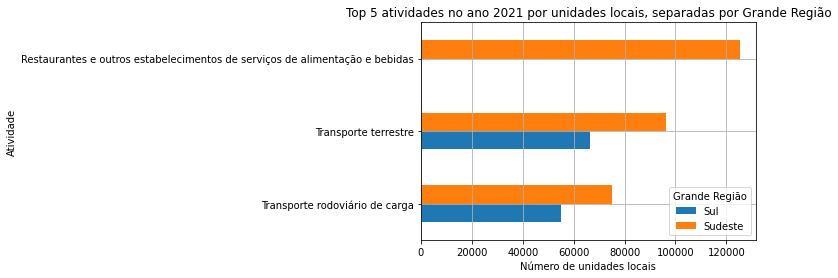

In [21]:
plotar_atividades(tabela=grand_reg, ano=2021, regiao='Grande Região')

A imagem acima mostra as informações da tabela visualmente.

Uma tendência semelhante foi encontrada ao verificar os anos de 2017 até 2020.

### Nível de unidades da federação

Agora observamos a tabela de top 5 atividades por unidades da federação. Observa-se que São Paulo lidera o top 3 nas atividades `Restaurantes`, `Transporte terrestre`e `Transporte rodoviário de carga`. Isso é consistente com as observações por grande região, em que o Sudeste foi responsável pelas top 3 atividades nestas atividades.

In [22]:
top_5_unids_2021 = top_5_unidades(tabela=unid_feds, ano=2021)
top_5_unids_2021

,Unidade da Federação,Ano,Atividade,Unidades locais
5474,São Paulo,2021,Restaurantes e outros estabelecimentos de serv...,74033
5445,São Paulo,2021,Transporte terrestre,58557
5454,São Paulo,2021,Transporte rodoviário de carga,46938
5720,Paraná,2021,Transporte terrestre,25910
4620,Minas Gerais,2021,Transporte terrestre,25592


Aqui visualizamos a mesma tabela no formato pivô. Observamos mais facilmente que as diferenças entre Paraná e Minas Gerais são pequenas, enquanto que São Paulo possui mais que o dobro de qualquer uma das unidades citadas no aspecto `Transporte terrestre`, e permanece isolada nas outras duas atividades.

In [23]:
top_5_unids_pivo = tabela_pivo(tabela=top_5_unids_2021, regiao='Unidade da Federação')
top_5_unids_pivo

Unidade da Federação,São Paulo,Paraná,Minas Gerais
Atividade,,,
Restaurantes e outros estabelecimentos de serviços de alimentação e bebidas,74033.0,NaN,NaN
Transporte terrestre,58557.0,25910.0,25592.0
Transporte rodoviário de carga,46938.0,NaN,NaN


Abaixo o gráfico descrevendo essas informações graficamente.

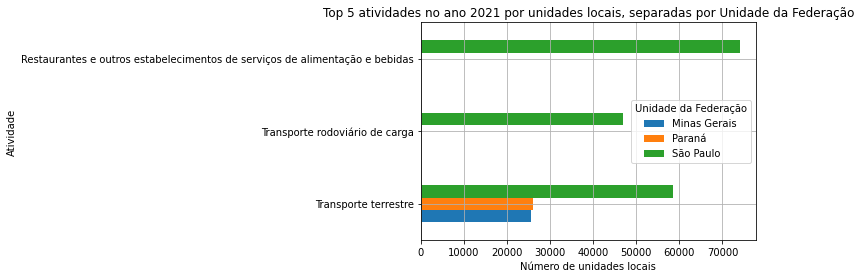

In [24]:
plotar_atividades(tabela=unid_feds, ano=2021, regiao='Unidade da Federação')

É interessante notar que esse padrão não foi repetido nos anos anteriores. Para mostrar isso, criamos uma lista com tabelas pivôs dos outros anos.

In [25]:
# Inicializar lista para armazenar as tabelas
top_5_unids_anos = []

# Lista de anos
anos = [2017, 2018, 2019, 2020]

# Laço para criar a tabela por ano
for ano in anos:
    top_5 = top_5_unidades(tabela=unid_feds, ano=ano)
    top_5_unids_anos.append(tabela_pivo(tabela=top_5, regiao='Unidade da Federação'))

Abaixo observamos a tabela referente ao ano de 2019, que é semelhante às tabelas de 2017 e 2018. Nela podemos ver que `Minas Gerais` lidera o topo juntamente com `São Paulo`, ficando responsável pelas atividades de `Restaurantes` e `Transporte Terrestre`.

In [26]:
top_5_unids_anos[2]

Unidade da Federação,São Paulo,Minas Gerais
Atividade,,
Restaurantes e outros estabelecimentos de serviços de alimentação e bebidas,79379.0,26527.0
Transporte terrestre,57114.0,24788.0
Transporte rodoviário de carga,44985.0,NaN


Entretanto, no ano de `2020` a unidade do `Paraná` desponta para `Transporte terrestre` e `Minas Gerais` perde o posto, passando a ocupar apenas no caso de `Restaurantes`.

In [27]:
top_5_unids_anos[3]

Unidade da Federação,São Paulo,Paraná,Minas Gerais
Atividade,,,
Restaurantes e outros estabelecimentos de serviços de alimentação e bebidas,75960.0,NaN,24761.0
Transporte terrestre,57496.0,25131.0,NaN
Transporte rodoviário de carga,45887.0,NaN,NaN


Algumas hipóteses podem ser levantadas:
- Como 2020 foi o ano da pandemia de COVID-19, muitas pessoas fizeram compras no exterior através de aplicativos, passando por Curitiba no estado do Paraná, para entrega no restante do país. Isso pode ter elevado a quantidade de unidades de `Transporte terrestre` significativamente no ano de 2020;
- A queda de `Minas Gerais` no posto de `Restaurantes` em 2021 pode ser hipotetizada como resultado da pandemia em 2020, pois foi um ramo de atividade fortemente afetado pela pandemia.

### Nível de municípios

No nível municipal de análise, observamos que os dados formam uma imagem diferente. A tabela abaixo dos top 5 municípios com mais unidades locais por atividade mostra que os municípios do `Rio de Janeiro`, `Belo Horizonte`, `Fortaleza` e `Salvador` ocupam os postos, ocupados principalmente na atividade de `Restaurantes`.

In [28]:
top_5_munic_2021 = top_5_unidades(tabela=municipios, ano=2021)
top_5_munic_2021

,Município,Ano,Atividade,Unidades locais
891799,Rio de Janeiro (RJ),2021,Restaurantes e outros estabelecimentos de serv...,10692
635224,Belo Horizonte (MG),2021,Restaurantes e outros estabelecimentos de serv...,5343
261224,Fortaleza (CE),2021,Restaurantes e outros estabelecimentos de serv...,3139
891770,Rio de Janeiro (RJ),2021,Transporte terrestre,2984
594799,Salvador (BA),2021,Restaurantes e outros estabelecimentos de serv...,2936


Mostrando a tabela acima na forma de pivô facilita nossa análise:

In [29]:
top_5_munic_pivo = tabela_pivo(tabela=top_5_munic_2021, regiao='Município')
top_5_munic_pivo

Município,Rio de Janeiro (RJ),Belo Horizonte (MG),Fortaleza (CE),Salvador (BA)
Atividade,,,,
Restaurantes e outros estabelecimentos de serviços de alimentação e bebidas,10692.0,5343.0,3139.0,2936.0
Transporte terrestre,2984.0,NaN,NaN,NaN


Observa-se que o município do `Rio de Janeiro` possui larga diferença dos demais na atividade `Restaurantes`, sendo o dobro de `Belo Horizonte`, o triplo de `Fortaleza` e `Salvador`. Também o município da região Sudeste com mais `Transporte terrestre`.

Cabe aqui uma observação retirada a partir dos dados: embora `São Paulo` liderou neste ranking, isto provavelmente foi causado pelo valor agregado de vários municípios em detrimento de um único município com quantidade alta de unidades locais, como podemos observar no caso do `Rio de Janeiro`.

Abaixo vemos as informações dos municípios num gráfico de barras horizontais.

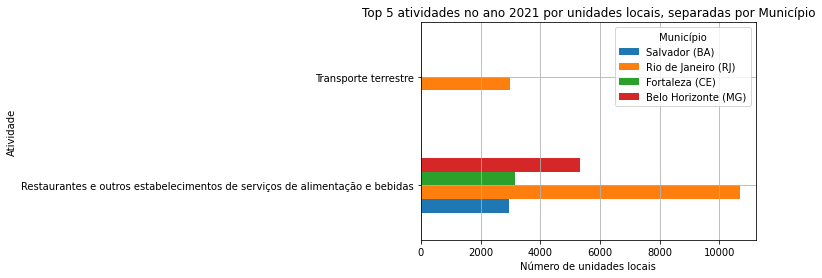

In [30]:
plotar_atividades(tabela=municipios, ano=2021, regiao='Município')

Abaixo criamos as tabelas para os demais anos.

In [31]:
# Lista inicializada para demais anos
top_5_munic_anos = []

# Laço para criar a tabela por ano
for ano in anos:
    top_5 = top_5_unidades(tabela=municipios, ano=ano)
    top_5_munic_anos.append(tabela_pivo(tabela=top_5, regiao='Município'))

Uma análise desses dados não revela padrões diferentes do encontrado para o ano de 2021, repetindo os municípios e propoções semelhantes entre as unidades locais.

# Conclusão

Não foi possível retirar mais informações desses dados devido a um prazo limitado, além de ausência de algumas informações.

Conforme consta no arquivo enviado, outras informações pertinentes são:
- pessoal ocupado total e assalariado;
- salários e outras remunerações;
- salários por seção;
- divisão;
- grupo e classe da classificação de atividades (CNAE 2.0).

De posse de mais informações seria possível arriscar maiores análises estatísticas, tanto através de estatística descritiva, com salários e unidades locais, como talvez algumas mais avançadas como correlações, covariância de dados. Além disso, seria possível formular um modelo para análises preditivas.